In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py

In [209]:
x = np.array((2.4, 3.4, 4.6, 3.7, 2.2, 3.3, 4.0, 2.1))
y = np.array((3.33, 2.12, 1.86, 1.65, 2.00, 1.76, 2.11, 2.63))

data = np.column_stack((x, y))
df = pd.DataFrame(data, columns=["x", "y"])
df

,x,y
0,2.400,3.330
1,3.400,2.120
2,4.600,1.860
3,3.700,1.650
4,2.200,2.000
5,3.300,1.760
6,4.000,2.110
7,2.100,2.630


#### Sum of Squares
$$ S_{xx} =\sum(x - \bar x)^2 \qquad S_{yy} =\sum(y - \bar y)^2 \qquad S_{xy} =\sum{(x - \bar x)(y - \bar y)} $$

In [210]:
xbar = np.mean(x)
ybar = np.mean(y)

sxx = np.sum((x - xbar) ** 2)
syy = np.sum((y - ybar) ** 2)
sxy = np.sum((x - xbar) * (y - ybar))

print(f"Sxx = {sxx:.4f}; Syy = {syy:.4f}; Sxy = {sxy:.4f}")

Sxx = 5.7487; Syy = 2.1256; Sxy = -2.0583


#### Correlation Coefficient
$$ r(X, Y) = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}} $$

In [211]:
r = sxy / (np.sqrt(sxx * syy))
print(f"Theoretical correlation coefficient value: {r:.3f}")

cor1 = df.corr()
cor2 = np.corrcoef(x, y)
print(f"Correlation coefficient calculated:\n")
display(cor1.round(2))
display(cor2.round(2))

Theoretical correlation coefficient value: -0.589
Correlation coefficient calculated:



,x,y
x,1.000,-0.590
y,-0.590,1.000


array([[ 1.  , -0.59],
       [-0.59,  1.  ]])

In [212]:
data = pd.read_csv("Advertising1.csv")
col_num = data.shape[0]
data.head()

,No,TV,radio,newspaper,sales
0,61,53.500,2.000,21.400,8.100
1,183,56.200,5.700,29.700,8.700
2,7,57.500,32.800,23.500,11.800
3,130,59.600,12.000,43.100,9.700
4,25,62.300,12.600,18.300,9.700


In [213]:
X = data[['TV', 'radio', 'newspaper', 'sales']]

mean = pd.DataFrame(X.mean())
meanT = pd.DataFrame(X.mean()).T
display(meanT)

one_vector = pd.DataFrame(np.ones(col_num))
mean_vector = np.dot(one_vector, meanT)
display(mean_vector.round(2))

,TV,radio,newspaper,sales
0,157.659,22.175,29.953,14.722


array([[157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66,  22.17,  29.95,  14.72],
       [157.66, 

In [214]:
Xc = X - mean_vector
Xc.round(2)

,TV,radio,newspaper,sales
0,-104.160,-20.170,-8.550,-6.620
1,-101.460,-16.470,-0.250,-6.020
2,-100.160,10.630,-6.450,-2.920
3,-98.060,-10.170,13.150,-5.020
4,-95.360,-9.570,-11.650,-5.020
...,...,...,...,...
134,82.440,-14.870,-21.250,-1.520
135,84.040,15.830,-6.750,7.080
136,85.540,26.830,14.350,10.680
137,90.740,8.030,-9.650,5.480


The sample covariance matrix 
$$ S = \frac{1}{n-1}Xc^\top Xc $$
The Sample Correlation Matrix
$$ R = D^{-\frac{1}{2}} SD^{-\frac{1}{2}} $$

In [215]:
S = np.dot(Xc.T, Xc) / (col_num - 1)
S

np.diag(np.diag(S)) # Creating it as a diagonal element in the matrix
D = np.linalg.inv(np.diag(np.diag(S))) # each element do 1/ it - D inverse matrix
R = np.dot(np.sqrt(D), np.dot(S, np.sqrt(D)))
print("This is the correlation matrix calculated")
df = pd.DataFrame(R).round(3)
display(df)


This is the correlation matrix calculated


,0,1,2,3
0,1.000,0.154,0.034,0.631
1,0.154,1.000,0.320,0.828
2,0.034,0.320,1.000,0.213
3,0.631,0.828,0.213,1.000


In [216]:
X.corr().round(3)

,TV,radio,newspaper,sales
TV,1.000,0.154,0.034,0.631
radio,0.154,1.000,0.320,0.828
newspaper,0.034,0.320,1.000,0.213
sales,0.631,0.828,0.213,1.000


---

## Regression

In [217]:
adv = pd.read_csv("Advertising1.csv")
display(adv.shape)
adv.head()

(139, 5)

,No,TV,radio,newspaper,sales
0,61,53.500,2.000,21.400,8.100
1,183,56.200,5.700,29.700,8.700
2,7,57.500,32.800,23.500,11.800
3,130,59.600,12.000,43.100,9.700
4,25,62.300,12.600,18.300,9.700


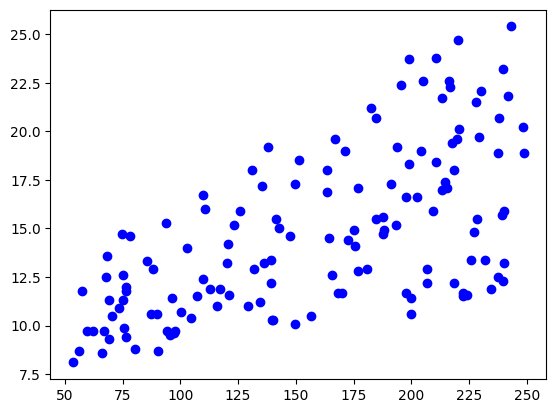

In [218]:
x = adv['TV']
y = adv['sales']
n = adv.shape[0]
py.plot(x, y, 'o', color='blue')

**Sum of Squares**
$$ S_{xx} = \sum(x - \bar x)^2 \qquad S_{yy} = \sum{(y - \bar y)}^2 \qquad S_{xy} = \sum{(x - \bar x)(y - \bar y)}$$

**Least square estimator for a simple regression modal**
$$ \hat \beta_1 = \frac{S_{xy}}{S_{xx}} \text{ and } \hat\beta_0 = \bar y - \hat \beta_1 \bar x $$

In [219]:
xbar = np.mean(x)
ybar = np.mean(y)
sxx = np.sum((x - xbar) ** 2)
syy = np.sum((y - ybar) ** 2)
sxy = np.sum((x - xbar) * (y - ybar))

data = np.column_stack((xbar, ybar, sxx, syy, sxy))
SS = pd.DataFrame(data, columns= ['xbar', 'ybar', 'sxx', 'syy', 'sxy'])
pd.options.display.float_format = '{:,.1f}'.format # when we make the report, adding extra dps is unnecessary and not so good
display(SS)

,xbar,ybar,sxx,syy,sxy
0,157.7,14.7,"478,664.7","2,348.2","21,156.6"


In [220]:
beta1hat = sxy / sxx
beta0hat = ybar - (beta1hat * xbar)
data = np.column_stack((beta1hat, beta0hat))
coef = pd.DataFrame(data, columns= ['beta1hat', 'beta0hat'])
pd.options.display.float_format = '{:,.4f}'.format # when we make the report, adding extra dps is unnecessary and not so good
display(coef)

# We always calculate the beta1hat first, then the beta0hat
print(f"The coefficient of the fitted linear regression model is y = {beta0hat:6.4} + {beta1hat:6.3}x")


,beta1hat,beta0hat
0,0.0442,7.7532


The coefficient of the fitted linear regression model is y =  7.753 + 0.0442x


##### ANOVA

The predicted value of $y_i$
$$ y_i = \beta_0 + \hat \beta_1 x_i $$
$$ \hat y_i = \hat \beta_0 + \hat \beta_1 x_1$$

Residual = $$ e_i = y_i - \hat{y_i} $$

$$ SST = SSR + SSE $$
$$ SST = \sum{(y_i - \bar y)}^2 \qquad SSR = \sum{(\hat y_i - \bar y)^2} \qquad SSE = \sum{(y_i - \hat{y_i})^2}$$

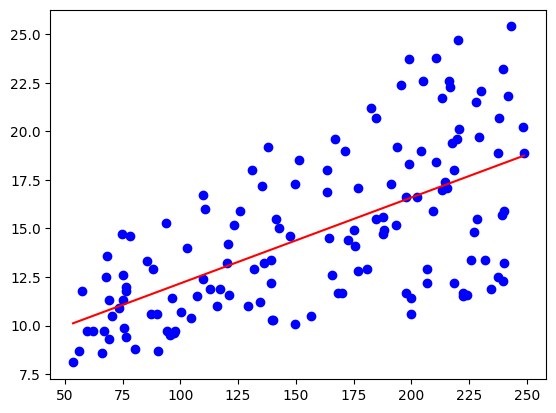

In [221]:
yhat = beta0hat + (beta1hat * x)
residual_e = y - yhat

## This is how to add the regression line on the plot
py.scatter(x, y, color= 'blue')
py.plot(x, yhat, color= 'red')
py.show()

In [222]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

model = ols('sales ~ TV', data = adv).fit()
anova_table = sm.stats.anova_lm(model, type = 1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
TV,1.0000,935.1061,935.1061,90.6605,0.0000
Residual,137.0000,"1,413.0691",10.3144,NaN,NaN


#### ANOVA Chart

In [223]:
SST = np.sum((y - ybar) ** 2) # SST = syy, in ANOVA context,
SSR = np.sum((yhat - ybar) ** 2)
SSE = np.sum((y - yhat) ** 2)

data = np.column_stack((SST, SSR, SSE))
pd.options.display.float_format = '{:,.1f}'.format 
SSA = pd.DataFrame(data, columns=['SST', 'SSR', 'SSE'])
SSA

,SST,SSR,SSE
0,"2,348.2",935.1,"1,413.1"


In [224]:
k = 1 # the number of predictors in the regression model (Degree of freedom for SSR)
df = n - k - 1 # The degree of freedom for SSE
MSR = SSR / k
MSE = SSE / df
F0 = MSR / MSE
pvalF = (1 - stats.f.cdf(F0, k, df))

ANOVA = pd.DataFrame({
    'Source': ['SSR', 'SSE', 'SST'],
    'SS': [SSR, SSE, SST],
    'df': [k, df, n - 1],
    'F0': [F0, '',''],
    'p_value': [pvalF, '','']
})
ANOVA

,Source,SS,df,F0,p_value
0,SSR,935.1,1,90.7,0.0
1,SSE,"1,413.1",137,,
2,SST,"2,348.2",138,,


### Summary statistics
$$ E(\varepsilon_i) = 0 \qquad V(\varepsilon_i)= \sigma^2 $$

The estimator for $ \sigma^2 $

$$ s^2 = \frac{1}{n - 2} \sum{(\underbrace{y_i - \hat y_i}_{{\color{red} e_i}})^2} = \frac{SSE}{n-2} = \frac{\sum{e^2}}{n-2}$$

Note that $E(s^2) = \sigma^2$ (Unbiased estimator)
- Coefficient of Determination
$$ R^2 = \frac{SSR}{SST} $$

- Correlation Coefficient, $R^2$, $\hat\beta_1$
$$ R^2 = r^2 \qquad \hat\beta_1 = r\sqrt{\frac{S_{yy}}{S_{xx}}}

In [225]:
s2 = SSE / (n - 2)
s = np.sqrt(s2)

R2 = SSR / SST
r = sxy / np.sqrt(sxx * syy)

# double check that the r^2 should be equal to R2
print(f"Check that r2 == R2, r2 = {r**2}; R2 = {R2}")
print(f"Check that beta1hat ({beta1hat}) == r * sqrt(syy/sxx) ({r * np.sqrt(syy/sxx)})")

r = sxy / np.sqrt(sxx * syy)
data = np.column_stack((s2, s, R2, r))
pd.options.display.float_format = '{:,.3f}'.format 
summary = pd.DataFrame(data, columns = ['s2', 's', 'R2', 'r'])
display(summary)

Check that r2 == R2, r2 = 0.3982267220235831; R2 = 0.3982267220235832
Check that beta1hat (0.04419923606423687) == r * sqrt(syy/sxx) (0.04419923606423686)


,s2,s,R2,r
0,10.314,3.212,0.398,0.631


#### Parameter Estimate
$$ \hat\beta_0 =\bar y - \hat \beta_1 \bar x \qquad s.e({\hat \beta_0}) = s\sqrt{\frac{1}{n} + \frac{\bar x^2}{S_{xx}}} \qquad t = \frac{\hat \beta_0}{s.e(\hat\beta_0)} $$
$$ \hat\beta_1 = \frac{S_{xy}}{S_{yy}} \qquad s.e(\hat \beta_1) = \frac{s}{\sqrt{S_{xx}}} \qquad t = \frac{\hat\beta_1}{s.e{(\hat \beta_1)}}$$

##### Confidence Interval
$$ \hat\beta_0 \pm t_{df, \alpha/2}s.e(\hat \beta_0)$$
$$ \hat\beta_1 \pm t_{df, \alpha/2}s.e(\hat \beta_1)$$

In [226]:
alpha = 0.05
sebeta0 = s * np.sqrt((1 / n) + ((xbar ** 2) / sxx))
sebeta1 = s / (np.sqrt(sxx))

tbeta0 = beta0hat / sebeta0
tbeta1 = beta1hat / sebeta1
pvalue0 = (1 - stats.t.cdf(abs(tbeta0), df)) * 2
pvalue1 = (1 - stats.t.cdf(abs(tbeta1), df)) * 2

lower_bound_beta0 = beta0hat - stats.t(df = df).ppf(1 - alpha / 2) * sebeta0
upper_bound_beta0 = beta0hat + stats.t(df = df).ppf(1 - alpha / 2) * sebeta0

lower_bound_beta1 = beta1hat - stats.t(df = df).ppf(1 - alpha / 2) * sebeta1
upper_bound_beta1 = beta1hat + stats.t(df = df).ppf(1 - alpha / 2) * sebeta1

parameter_estimate = pd.DataFrame({
    'Parameter': ['Intercept', 'Slope'],
    'Values': [beta0hat, beta1hat],
    's.e': [sebeta0, sebeta1],
    'tvalue': [tbeta0, tbeta1],
    'pvalue': [pvalue0, pvalue1],
    'Lower bounds': [lower_bound_beta0, lower_bound_beta1],
    'Upper bound': [upper_bound_beta0, upper_bound_beta1]
})
parameter_estimate

,Parameter,Values,s.e,tvalue,pvalue,Lower bounds,Upper bound
0,Intercept,7.753,0.781,9.928,0.000,6.209,9.297
1,Slope,0.044,0.005,9.522,0.000,0.035,0.053


##### $ (1 - \alpha) $% Confidence Interval for $\hat y_0$`s
$$ \left(\hat y_0 - t_{(n-2, \alpha/2)}\cdot s.e(\hat y_0),\qquad \hat y_0 + t_{n - 2, \alpha/2}\cdot s.e(\hat y_0)\right) $$

$$ \left(\hat y_0 - t_{(n-2, \alpha/2)}\cdot s\sqrt{\frac{1}{n} + \frac{(x_0 - \bar x)^2}{S_{xx}}}, \qquad \hat y_0 + t_{n - 2, \alpha/2}\cdot s\sqrt{\frac{1}{n} + \frac{(x_0 - \bar x)^2}{S_{xx}}}\right) $$

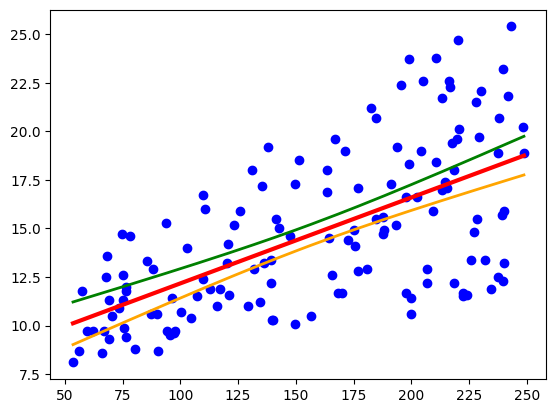

In [233]:
yhat_lower_bound = yhat - stats.t(df = df).ppf(1 - alpha / 2) * (s * np.sqrt(1/n + (x - xbar) ** 2 / sxx))
yhat_upper_bound = yhat + stats.t(df = df).ppf(1 - alpha / 2) * (s * np.sqrt(1/n + (x - xbar) ** 2 / sxx))

py.scatter(x, y, color='blue')
py.plot(x, yhat, color = 'red', lw=3)
py.plot(x, yhat_lower_bound, color='orange', lw=2)
py.plot(x, yhat_upper_bound, color='green', lw=2)

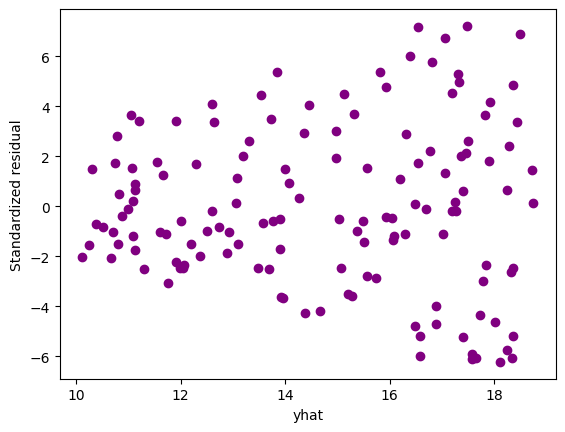

In [234]:
e = y - yhat
r = e / s
py.scatter(yhat, e, color='purple')
py.ylabel('Standardized residual')
py.xlabel('yhat')
py.show()

In [230]:
X = x
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
display(results.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.7532,0.781,9.928,0.000,6.209,9.297
TV,0.0442,0.005,9.522,0.000,0.035,0.053
